 ## Project "Shelter Animal Outcomes" (not finished yet)

This project was written for a Kaggle competition:
https://www.kaggle.com/c/shelter-animal-outcomes/data
Our goal was to predict the outcome of the animal as they leave the Animal Center.. We use the date comes from Austin Animal Center (October 1st, 2013 - March, 2016). Outcomes represent the status of animals as they leave the Animal Center. 

The first look at the data:

In [14]:
import pandas
data = pandas.read_csv("train.csv")
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


We have 5 different outcomes. Let's plot the distributions of outcomes

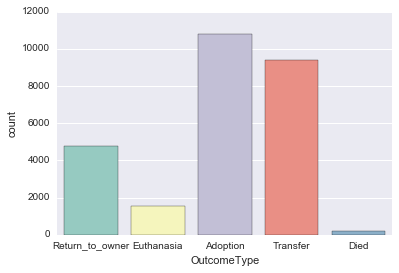

In [5]:
import seaborn as sns
%matplotlib inline
sns.countplot(data.OutcomeType, palette='Set3')

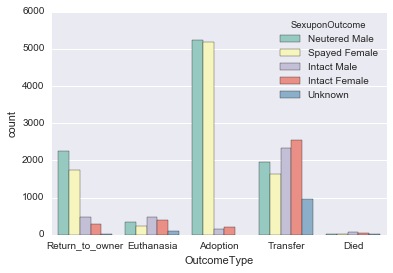

In [23]:

sns.countplot(data=data, x='OutcomeType',hue='SexuponOutcome', palette="Set3")

Thus plot gives us some interesting information:
Neutered Male and Spayed Female have a great chance to be adopted, but it is very hard to find new family for Intact Male and Intact Female! 

The next observation is that we do not need AnimaId, OutcomeSubtype. 
We no not know some animals' names. I think, animals with known name should be more likely to returnee home since we can suggest that these animals has an ID tag. Thus, can replace known name by 1 and unknown name by 0.

In [18]:
data['Name'] =data['Name'].fillna(0)
data.loc[data['Name'] != 0, "Name"] = 1

from sklearn.feature_extraction import DictVectorizer
def encode_onehot(my_data, cols):
    vec = DictVectorizer()
    
    vec_data = pandas.DataFrame(vec.fit_transform(my_data[cols].to_dict(orient='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = my_data.index
    
    my_data = my_data.drop(cols, axis=1)
    my_data = my_data.join(vec_data)
    return my_data

df = encode_onehot(data, cols=['AnimalType', 'Breed', 'Color', 'SexuponOutcome'])
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AgeuponOutcome,AnimalType=Cat,AnimalType=Dog,Breed=Abyssinian Mix,Breed=Affenpinscher Mix,...,Color=Yellow Brindle/White,Color=Yellow/Black,Color=Yellow/White,Color=Yellow/Yellow,SexuponOutcome,SexuponOutcome=Intact Female,SexuponOutcome=Intact Male,SexuponOutcome=Neutered Male,SexuponOutcome=Spayed Female,SexuponOutcome=Unknown
0,A671945,1,2014-02-12 18:22:00,Return_to_owner,NaN,1 year,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,A656520,1,2013-10-13 12:44:00,Euthanasia,Suffering,1 year,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,A686464,1,2015-01-31 12:28:00,Adoption,Foster,2 years,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,A683430,0,2014-07-11 19:09:00,Transfer,Partner,3 weeks,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,A667013,0,2013-11-15 12:52:00,Transfer,Partner,2 years,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
